# Car Fuel Consumption prediction

- I am driving always the same car and i take almost always the same route. However, at the gas station i like to change the gas type; between SP98 (sold as "Super plus" sometimes) and SP95 E10 (This is, "super" gas with 10% Alcohol). E10 is sold for 1,38€; SP98 is sold for 1,46€; per liter.

- From my feeling i would say that my car consumes a lot more with E10. From the data, what can we derive there?
I challenge you to partial out the factor "E10 gas" and tell me how much my car really consumes more with it.

- I challenge you to predict the consumption depending on the gas type!

Since a few months, i write down the data of my car's display after each ride; while regularly changing the gas type.

- In the file, you will find the displayed distance (km); the consume (L/100km); the average speed (km/h), the temperature i had inside (°C), the temperature outside (°C), anything special that happened, if it was raining, if the air condition was on, if it was sunny enough that the car felt warm when i started it… and yes - the gas type i was using. I have also two columns saying how much and which gas type I was buying. Careful with those. The numbers don't add exactly up, because I note only the rides that occur under certain conditions: If the car was not cooling down enough to have another independent measure from the one before, i don't note it.

# Importing required libraries for the project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Loading real estate dataset from git hub account

In [2]:
Realdf = pd.read_csv('https://raw.githubusercontent.com/Manju410/MLPractice/main/measurements.csv')

In [3]:
Realdf.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


- Number of rows and columns in the dataset

In [4]:
strcols = Realdf.dtypes[Realdf.dtypes == 'object'].index.tolist()
strcols

['distance',
 'consume',
 'temp_inside',
 'specials',
 'gas_type',
 'refill liters',
 'refill gas']

In [5]:
for col in strcols:
  Realdf[col]= Realdf[col].str.replace(',','.')


In [7]:
Realdf.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [8]:
Realdf.drop(columns=['AC','rain','sun','refill liters','refill gas'],inplace=True,axis=1)

In [9]:
Realdf.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type
0,28,5,26,21.5,12,NaN,E10
1,12,4.2,30,21.5,13,NaN,E10
2,11.2,5.5,38,21.5,15,NaN,E10
3,12.9,3.9,36,21.5,14,NaN,E10
4,18.5,4.5,46,21.5,15,NaN,E10


In [ ]:
Realdf.shape

(388, 7)

- Above Car dataset contains 388 rows and 12 columns.

- Information about dataset like datatype,count etc

In [11]:
Realdf[Realdf.temp_inside.isna()].tail(10)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type
97,15.7,5.3,33,NaN,9,NaN,SP98
98,12.9,5.7,35,NaN,9,NaN,SP98
99,6.4,4.4,37,NaN,10,NaN,SP98
100,5.3,4.1,34,NaN,9,NaN,SP98
102,18.8,5,62,NaN,9,rain,SP98
201,22.2,3.8,42,NaN,15,NaN,SP98
203,12.6,4.1,33,NaN,17,NaN,SP98
261,24.5,3.9,50,NaN,15,sun,E10
267,22.9,4,29,NaN,21,NaN,E10
268,16,3.8,42,NaN,8,NaN,E10


In [ ]:
Realdf['refill liters'].unique()

array(['45', nan, '37,6', '37,7', '38', '38,3', '10', '39', '41', '37',
       '37,2'], dtype=object)

In [ ]:
Realdf['refill gas'].unique()

array(['E10', nan, 'SP98'], dtype=object)

In [ ]:
Realdf['gas_type'].unique()

array(['E10', 'SP98'], dtype=object)

In [ ]:
Realdf['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [ ]:
Realdf['temp_inside'].unique()

array(['21,5', '22,5', '20', nan, '21', '20,5', '23', '23,5', '25', '24',
       '22', '19', '24,5', '25,5'], dtype=object)

In [ ]:
Realdf.AC.unique()

array([0, 1])

In [ ]:
Realdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   376 non-null    object
 4   temp_outside  388 non-null    int64 
 5   specials      93 non-null     object
 6   gas_type      388 non-null    object
dtypes: int64(2), object(5)
memory usage: 21.3+ KB


# summary of above output
- Above Dataset contains 12 columns.
- 5 columns are integer datatype and 7 columns are object datatype.
- In the Above Dataset temp inside, temp outside, specials and refil gas,liters contain many missing values.
- Cars dataset contains total 388 entries.

- Checking null values in dataset

In [ ]:
Realdf.isna().sum()

distance          0
consume           0
speed             0
temp_inside      12
temp_outside      0
specials        295
gas_type          0
dtype: int64

- Extract Train Test Dataset

In [ ]:
X = Realdf.iloc[:,[0,1,3,4,5,6,7]]
y = Realdf['selling_price'].values.reshape(-1,1)

In [ ]:
X.head()

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner


- Converting y values to 2 dimensional array

In [ ]:
X.shape,y.shape

((4340, 7), (4340, 1))

# converting categorical values to Numerical using dummy values

In [ ]:
name = X.name.unique().tolist()

In [ ]:
fuel = X.fuel.unique().tolist()
fuel

['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric']

In [ ]:
seller = X.seller_type.unique().tolist()
seller

['Individual', 'Dealer', 'Trustmark Dealer']

In [ ]:
trmsion = X.transmission.unique().tolist()
trmsion

['Manual', 'Automatic']

In [ ]:
owner = X.owner.unique().tolist()
owner

['First Owner',
 'Second Owner',
 'Fourth & Above Owner',
 'Third Owner',
 'Test Drive Car']

- Assign numerical values to each category

In [ ]:
namenum = {nm:count for count,nm in enumerate(name)}

In [ ]:
fuelnum = {name:count for count,name in enumerate(fuel)}
fuelnum

{'CNG': 2, 'Diesel': 1, 'Electric': 4, 'LPG': 3, 'Petrol': 0}

In [ ]:
sellernum = {name:count for count,name in enumerate(seller)}
seller

['Individual', 'Dealer', 'Trustmark Dealer']

In [ ]:
trnsmnnum = {name:count for count,name in enumerate(trmsion)}
trnsmnnum

{'Automatic': 1, 'Manual': 0}

In [ ]:
ownernum = {name:count for count,name in enumerate(owner)}
ownernum

{'First Owner': 0,
 'Fourth & Above Owner': 2,
 'Second Owner': 1,
 'Test Drive Car': 4,
 'Third Owner': 3}

In [ ]:
catnums = { **namenum,**fuelnum ,**sellernum , **trnsmnnum, **ownernum }

In [ ]:
catcols = X.dtypes[X.dtypes =='object'].index.tolist()
catcols

['name', 'fuel', 'seller_type', 'transmission', 'owner']

In [ ]:
X[catcols].applymap(lambda x :catnums.get(x)).head()

,name,fuel,seller_type,transmission,owner
0,0,0,0,0,0
1,1,0,0,0,0
2,2,1,0,0,0
3,3,0,0,0,0
4,4,1,0,0,1


In [ ]:
X.loc[:,catcols] = X[catcols].applymap(lambda x :catnums.get(x))
X.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,name,year,km_driven,fuel,seller_type,transmission,owner
0,0,2007,70000,0,0,0,0
1,1,2007,50000,0,0,0,0
2,2,2012,100000,1,0,0,0
3,3,2017,46000,0,0,0,0
4,4,2014,141000,1,0,0,1


# Spliting data to train and test lists

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1234)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3255, 7), (1085, 7), (3255, 1), (1085, 1))

# Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lrmodel = LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Checking intercept and slope for the dataset

In [ ]:
c = lrmodel.intercept_
m = lrmodel.coef_
c,m

(array([-78248838.62889779]),
 array([[-4.14312384e+00,  3.90314531e+04, -6.86328094e-01,
          2.14854440e+05,  1.00756056e+05,  9.05487376e+05,
         -1.05666566e+04]]))

In [ ]:
Realdf.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

- Prdecting for X_train to check how model learnt from given data

In [ ]:
y_learntdf = lrmodel.predict(X_train)
y_learntdf[:5]

array([[ 566056.68904336],
       [ 388719.21641256],
       [ 389710.37002458],
       [1392209.97040686],
       [ 477161.38925298]])

In [ ]:
learndf = pd.DataFrame({'Actual':y_train[:,0],'Learnt':y_learntdf[:,0]})
learndf.head()

,Actual,Learnt
0,750000,5.660567e+05
1,500000,3.887192e+05
2,330000,3.897104e+05
3,1150000,1.392210e+06
4,225000,4.771614e+05


- ploting bar graph to visuialaize actual and learnt values

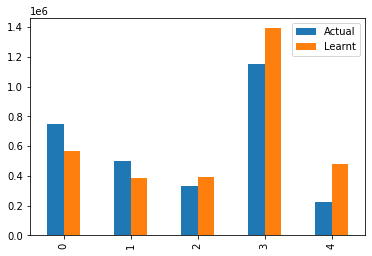

In [ ]:
learndf.head().plot(kind='bar')

# importing metrics from sklearn to check mean square error

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
train_mse = mse(y_train,y_learntdf)
train_mse

197363456921.5813

In [ ]:
rmse_train = np.sqrt(train_mse)
rmse_train

444256.071339021

- predicting for test data set

In [ ]:
testdf = lrmodel.predict(X_test)
testdf[:5]

array([[ 765850.99111734],
       [ 782749.29252276],
       [ 166286.03207532],
       [1354696.99502783],
       [ 591976.91593535]])

In [ ]:
test = pd.DataFrame({'Actual':y_test[:,0],'Pred':testdf[:,0]})
test.head()

,Actual,Pred
0,1260000,7.658510e+05
1,750000,7.827493e+05
2,300000,1.662860e+05
3,1800000,1.354697e+06
4,625000,5.919769e+05


In [ ]:
test_mse = mse(y_test,testdf)
test_mse

156854673582.88336

In [ ]:
rmse_test = np.sqrt(test_mse)
rmse_test

396048.8272711881

# R2 score

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_real = r2_score(y_test,testdf)
r2_real

0.4392822198598634

In [ ]:
y_mean = Realdf.selling_price.mean()**2
y_mean

254144346453.4433